## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

## About DataFrame - 

The data set for the coursework is a sample from Stallkamp et al's German Street Sign Recognition Benchmark.
Originally the data set consisted of 39,209 RGB-coloured train and 12,630 RGB-coloured test images of
different sizes displaying 43 different types of German traffic signs. These images are not centred and are
taken during different times of the day.

This data set is considered to be an important benchmark for Computer Vision, as has close relation to the
street sign recognition tasks that autonomous cars have to perform. And safe deployment of autonomous cars
is the next big challenge that researchers and engineers face. 

You will be working with a sample of this data set which consists of 10 classes and 12660 images. The images
have been converted to grey-scale with pixel values ranging from 0 to 255, and were rescaled to a common
size of 48*48 pixels. Hence, each row (= feature vector) in the data set has 2305 features, and represents a
single image in row-vector format (2304 features) plus its associated label. Compensating the light conditions
and position of the images is not necessary for the coursework and is left for the interested student to do. 

Below, the class labels and their meanings are displayed:
- 0. speed limit 60 (original label: 3)
- 1. speed limit 80 (original label: 5)
- 2. speed limit 80 lifted (original label: 6)
- 3. right of way at crossing (original label: 11)
- 4. right of way in general (original label: 12)
- 5. give way (original label: 13)
- 6. stop (original label: 14)
- 7. no speed limit general (original label: 32)
- 8. turn right down (original label: 38)
- 9. turn left down (original label: 39)


In [2]:
DataFrame = pd.read_csv('http://www.macs.hw.ac.uk/~ek19/data/CW2/CSV/x_test_gr_smpl.csv',sep=',')
DataFrame.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,39.0,40.0,39.0,39.0,39.0,40.0,38.0,37.0,37.0,37.0,...,27.0,28.0,35.0,35.0,36.0,37.0,41.0,43.0,45.0,45.0
1,33.0,34.0,38.0,40.0,41.0,40.0,40.0,37.0,38.0,39.0,...,38.0,37.0,38.0,39.0,37.0,38.0,42.0,43.0,44.0,46.0
2,22.0,22.0,21.0,21.0,22.0,22.0,21.0,21.0,21.0,22.0,...,35.0,37.0,38.0,37.0,35.0,39.0,64.0,56.0,36.0,28.0
3,64.0,61.0,58.0,60.0,66.0,71.0,69.0,66.0,62.0,52.0,...,38.0,36.0,35.0,33.0,31.0,31.0,32.0,33.0,32.0,32.0
4,42.0,52.0,71.0,88.0,89.0,88.0,82.0,77.0,88.0,129.0,...,34.0,32.0,30.0,28.0,29.0,30.0,31.0,31.0,29.0,28.0


In [3]:
DataClass = pd.read_csv('http://www.macs.hw.ac.uk/~ek19/data/CW2/CSV/y_test_smpl.csv',sep=',')
DataClass.head()

,0
0,8
1,3
2,8
3,4
4,4


## Sample Image Plot

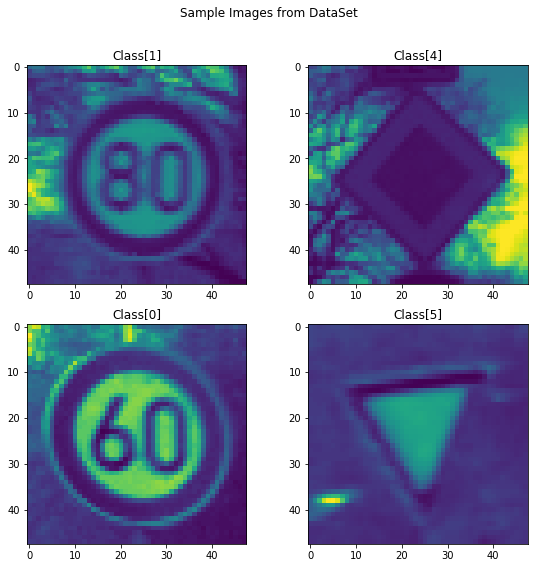

In [29]:
image1 = np.array(DataFrame.loc[21,:]).reshape(48,48)
image2 = np.array(DataFrame.loc[22,:]).reshape(48,48)
image3 = np.array(DataFrame.loc[23,:]).reshape(48,48)
image4 = np.array(DataFrame.loc[24,:]).reshape(48,48)

plt.rcParams["figure.figsize"]=8,8
fig, axs1 = plt.subplots(2,2)


axs1[0,0].imshow(image1)
axs1[0,0].set_title('Class'+str(DataClass.loc[21,:].values))


axs1[0,1].imshow(image2)
axs1[0,1].set_title('Class'+str(DataClass.loc[22,:].values))

axs1[1,0].imshow(image3)
axs1[1,0].set_title('Class'+str(DataClass.loc[23,:].values))

axs1[1,1].imshow(image4)
axs1[1,1].set_title('Class'+str(DataClass.loc[24,:].values))

fig.tight_layout()
fig.suptitle('Sample Images from DataSet')
fig.subplots_adjust(top=0.88)

plt.savefig('Sample_Image.png')
plt.show()

In [12]:
X = DataFrame.values
y = DataClass.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Decision Tree Classifier

In [13]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.894484412470024


In [14]:
confusion_matrix(y_test, y_pred)

array([[ 79,   6,   1,   0,   3,   1,   1,   0,   1,   0],
       [  8, 121,   4,   2,   1,   5,   0,   0,   3,   0],
       [  0,   2,  29,   0,   1,   0,   1,   0,   0,   1],
       [  0,   2,   1,  60,   1,   1,   2,   0,   1,   1],
       [  0,   3,   1,   3, 114,   1,   0,   0,   6,   0],
       [  0,   0,   1,   1,   0, 149,   1,   0,   0,   0],
       [  0,   0,   1,   0,   3,   0,  39,   0,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0,  11,   0,   0],
       [  0,   2,   0,   3,   6,   2,   1,   0, 127,   0],
       [  1,   0,   0,   0,   0,   0,   1,   0,   0,  17]])

## Random Forest 

In [15]:
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train,y_train.ravel())
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9784172661870504


In [16]:
confusion_matrix(y_test, y_pred)

array([[ 87,   4,   0,   0,   0,   0,   0,   0,   1,   0],
       [  3, 140,   0,   0,   1,   0,   0,   0,   0,   0],
       [  3,   0,  31,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,  68,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0, 127,   0,   0,   0,   0,   0],
       [  0,   1,   0,   0,   0, 151,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  43,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  12,   0,   0],
       [  1,   0,   0,   0,   1,   0,   0,   0, 139,   0],
       [  0,   1,   0,   0,   0,   0,   0,   0,   0,  18]])